Hello ! So for my first kernel ever, I will try to do some data visualization and to predict happiness with the given columns. There's a first time for everything, and after reading a lot on data science, I will try to do some work. Let's go !

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 7)

df = pd.read_csv("../input/happiness-and-alcohol-consumption/HappinessAlcoholConsumption.csv", sep=",", engine="python")

Populating the interactive namespace from numpy and matplotlib


Let's have a look at the data first.

In [2]:
print("{} countries".format(len(df)))
df.head()

122 countries


,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97


Let's see the happiness distribution, and some of the most/least happy country and others.

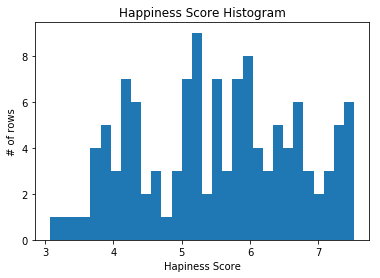

In [3]:
X = df["HappinessScore"]
plt.hist(X, bins=30)
plt.title("Happiness Score Histogram")
plt.xlabel("Hapiness Score")
plt.ylabel("# of rows")
plt.show()

In [4]:
print("Most happy country:")
max_happiness = df["HappinessScore"].max()
df[df["HappinessScore"] == max_happiness]

Most happy country:


,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278


In [5]:
print("Least happy country:")
min_happiness = df["HappinessScore"].min()
df[df["HappinessScore"] == min_happiness]

Least happy country:


,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
121,Syria,Middle East and Northern Africa,north,3.069,536,2.058,5,35,16


In [6]:
print("Most GDP per capita country:")
max_GDP = df["GDP_PerCapita"].max()
df[df["GDP_PerCapita"] == max_GDP]

Most GDP per capita country:


,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
101,Senegal,Sub-Saharan Africa,north,4.219,499,953.0,9,1,7


In [7]:
print("Most beer per capita country:")
max_beer = df["Beer_PerCapita"].max()
df[df["Beer_PerCapita"] == max_beer]

Most beer per capita country:


,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
90,Namibia,Sub-Saharan Africa,south,4.574,645,4.561,376,3,1


Okay so now we want to see if there's any correlation between columns. Can be useful.

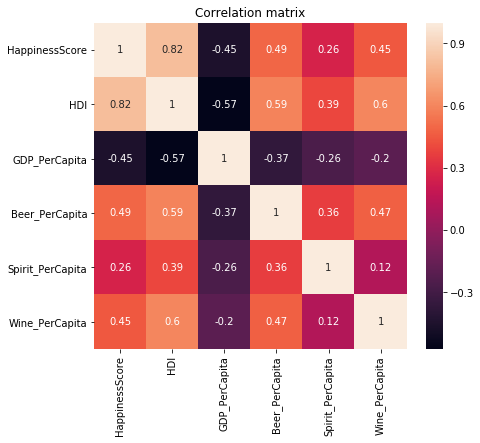

In [8]:
pylab.rcParams['figure.figsize'] = (7, 6)
sn.heatmap(df.corr(), annot=True)
plt.title("Correlation matrix")
plt.show()

Some curves to show whether or not there is a trivial correlation between some interesting columns.

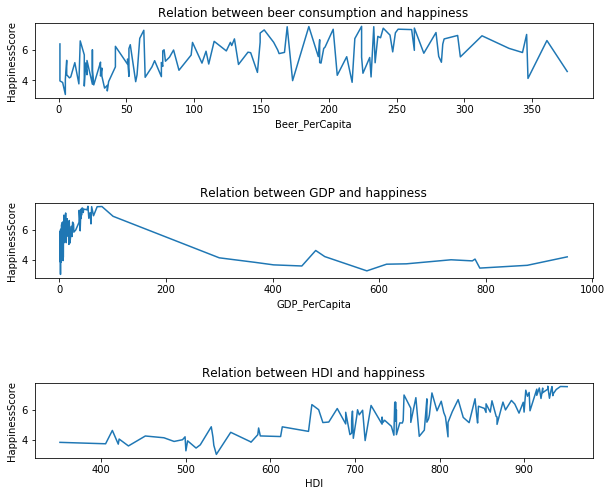

In [9]:
pylab.rcParams['figure.figsize'] = (10, 8)

df_sorted = df.sort_values(by=["Beer_PerCapita"])
X, y = df_sorted["Beer_PerCapita"], df_sorted["HappinessScore"]

plt.subplot(5, 1, 1)
plt.plot(X, y)
plt.xlabel("Beer_PerCapita")
plt.ylabel("HappinessScore")
plt.title("Relation between beer consumption and happiness")


df_sorted = df.sort_values(by=["GDP_PerCapita"])
X, y = df_sorted["GDP_PerCapita"], df_sorted["HappinessScore"]

plt.subplot(5, 1, 3)
plt.plot(X, y)
plt.xlabel("GDP_PerCapita")
plt.ylabel("HappinessScore")
plt.title("Relation between GDP and happiness")


df_sorted = df.sort_values(by=["HDI"])
X, y = df_sorted["HDI"], df_sorted["HappinessScore"]

plt.subplot(5, 1, 5)
plt.plot(X, y)
plt.xlabel("HDI")
plt.ylabel("HappinessScore")
plt.title("Relation between HDI and happiness")

plt.show()

As we can see, there seem to be a small correlation between HDI, GDP and happiness, but it appears that beer consumption isn't really related to happiness (and I'm pretty sorry for that, as I wanted to predict happiness only by using beer consumption).

Ok so, just for the kicks, let's look at the mean values when we look at the data grouped by Region.

In [10]:
df_group_by = df.groupby(["Region"]).mean()
df_group_by

,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
Region,,,,,,
Australia and New Zealand,7.323500,926.500000,45.114500,232.000000,75.500000,193.500000
Central and Eastern Europe,5.383444,794.703704,8.548222,170.074074,171.777778,83.814815
Eastern Asia,5.477000,824.500000,19.472000,93.250000,149.750000,10.250000
Latin America and Caribbean,6.061000,728.086957,39.653957,159.478261,109.913043,35.782609
Middle East and Northern Africa,5.443727,760.363636,17.543636,24.818182,41.363636,10.363636
North America,7.254000,922.000000,49.969000,244.500000,140.000000,92.000000
Southeastern Asia,5.492000,727.800000,13.522800,79.600000,104.600000,3.000000
Sub-Saharan Africa,4.151464,536.392857,306.069107,78.464286,20.750000,12.214286
Western Europe,6.731400,908.350000,45.973950,216.450000,101.500000,197.800000


Enought is enought, let's predict happiness score of a country.
We first try without any localization feature and for the rest of the kernel, we will only use a LinearRegression model.

In [11]:
# Predicting happiness using linear model
from sklearn import linear_model
from sklearn.model_selection import train_test_split
reg = linear_model.LinearRegression()

X_columns = ["HDI", "GDP_PerCapita", "Beer_PerCapita", "Wine_PerCapita", "Spirit_PerCapita"]

train = df.sample(frac=0.8,random_state=200)
test = df.drop(train.index)

X_train = train[X_columns]
y_train = train["HappinessScore"]
X_test = test[X_columns]
y_test = test["HappinessScore"]

reg.fit(X_train, y_train)
print("R^2 score:", reg.score(X_test, y_test))

R^2 score: 0.6218461039457828


Well,I know 0.6 isn't a good value, but I don't know how bad it is. Maybe I have not enought features ? Let's try to add some polynomial features.

In [12]:
# Predicting happiness using linear model, adding polynomial features
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
reg = linear_model.LinearRegression()
poly = PolynomialFeatures(2)

X_columns = ["HDI", "GDP_PerCapita", "Beer_PerCapita", "Wine_PerCapita", "Spirit_PerCapita"]

train = df.sample(frac=0.8,random_state=200)
test = df.drop(train.index)

X_train = train[X_columns]
y_train = train["HappinessScore"]
X_test = test[X_columns]
y_test = test["HappinessScore"]
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

reg.fit(X_train, y_train)
print("R^2 score with polynomial features:", reg.score(X_test, y_test))

R^2 score with polynomial features: 0.5151715565484432


Ok so now we are obviously overfitting. Let's forget about polynomial features, and now try adding a one-hot encoding on the Region values.

In [13]:
# Adding region to X_columns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
reg = linear_model.LinearRegression()

df_one_hot = pd.get_dummies(df, prefix="region", columns=["Region"])
X_columns = set(df_one_hot.columns.values) - {"Country", "HappinessScore", "Hemisphere"}

train = df_one_hot.sample(frac=0.8,random_state=200)
test = df_one_hot.drop(train.index)

X_train = train[X_columns]
y_train = train["HappinessScore"]
X_test = test[X_columns]
y_test = test["HappinessScore"]

reg.fit(X_train, y_train)
print("R^2 score with region infos:", reg.score(X_test, y_test))

R^2 score with region infos: 0.7077967115397028


0.7 is better ! Maybe with a one-hot encoding on the Region and Hemisphere feature ?

In [14]:
# Adding region and hemisphere to X_columns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
reg = linear_model.LinearRegression()

df_one_hot = pd.get_dummies(df, prefix="region", columns=["Region"])
df_one_hot["Hemisphere"] = df_one_hot["Hemisphere"].replace("noth", "north") # Correcting some misspells
df_one_hot = pd.get_dummies(df_one_hot, prefix="hemisphere", columns=["Hemisphere"])
X_columns = set(df_one_hot.columns.values) - {"Country", "HappinessScore"}

train = df_one_hot.sample(frac=0.8,random_state=200)
test = df_one_hot.drop(train.index)

X_train = train[X_columns]
y_train = train["HappinessScore"]
X_test = test[X_columns]
y_test = test["HappinessScore"]

reg.fit(X_train, y_train)
print("R^2 score with region and hemisphere infos:", reg.score(X_test, y_test))

R^2 score with region and hemisphere infos: 0.7122286024409764


Hemisphere does not really bring that much. We could select a few features just by looking at the correlation matrix ?

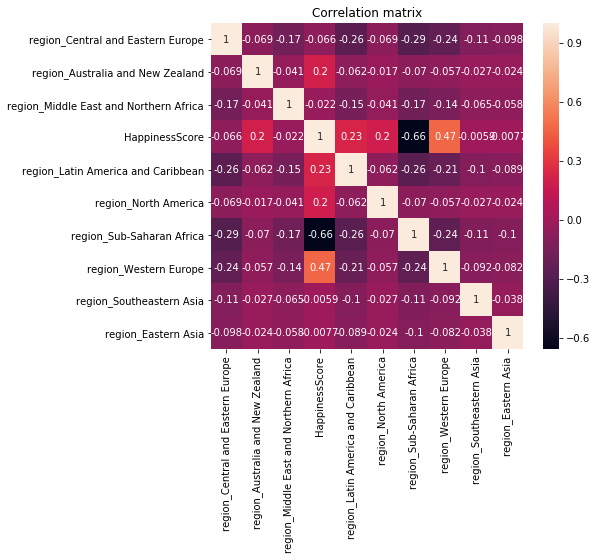

In [15]:
# New correlation matrix
df_one_hot = pd.get_dummies(df, prefix="region", columns=["Region"])
select_columns = set(df_one_hot.columns) - {"Country", "HDI", "GDP_PerCapita", "Beer_PerCapita", "Spirit_PerCapita", "Wine_PerCapita"}
df_corr = df_one_hot[select_columns]

pylab.rcParams['figure.figsize'] = (7, 6)
sn.heatmap(df_corr.corr(), annot=True)
plt.title("Correlation matrix")
plt.show()

Ok so now we can try one last time, with only HDI, GPD, Sub-Saharan Africa and Western Europe features (the one with the most happiness correlation).

In [16]:
# Final try, with selected columns, and polynomial features
# columns are selected according to the correlation matrices
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
reg = linear_model.LinearRegression()
poly = PolynomialFeatures(2)

df_one_hot = pd.get_dummies(df, prefix="region", columns=["Region"])
train = df_one_hot.sample(frac=0.8,random_state=200)
test = df_one_hot.drop(train.index)

X_columns = ["HDI", "GDP_PerCapita", "region_Sub-Saharan Africa", "region_Western Europe"]
X_train = train[X_columns]
y_train = train["HappinessScore"]
X_test = test[X_columns]
y_test = test["HappinessScore"]
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

reg.fit(X_train, y_train)
print("R^2 score with selected polynomial features:", reg.score(X_test, y_test))

R^2 score with selected polynomial features: 0.783518788550678


Well, 0.78 is better, but I guess this is not the 0.99 I usually find in books. There may be some better model / data preparation to increase the R², but I feel like with those features, we are not able to completly define the happiness score.
Anyway, it is interesting to see that we ended up predicting happiness score without using alcohol consumption !
Maybe we could add a summary of all alcohol columns into one (like a sum, ponderated by the alcohol rate ?)